# resolución solemne 1 minería de datos

## Lo primero será importar las bibliotecas de Pandas, Google Cloud, request para visualizar una api publica y Matplotlib para graficar.

In [1]:
import requests
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt


## En primer lugar, visualizaré los datos provenientes de la base de datos de BigQuery. Para ser más específico, los datos consultados son los siguientes: covid19_public_forecasts.

In [2]:
client = bigquery.Client()

#contruyo una referencia para el junto de datos de covid19
dataset_ref = client.dataset("covid19_public_forecasts", project="bigquery-public-data")

dataset = client.get_dataset(dataset_ref)

#Enumerar todas las tablas en el conjunto de datos "covid19_public_forecasts"
tables = list(client.list_tables(dataset))

# Imprimo los nombres de todas las tablas del conjunto de datos para tener una mejor visualizacion de lo que hay
for table in tables:  
    print(table.table_id)


county_14d
county_14d_historical
county_14d_historical_
county_28d
county_28d_historical
county_28d_historical_
japan_prefecture_28d
japan_prefecture_28d_historical
japan_prefecture_28d_historical_
state_14d
state_14d_historical
state_14d_historical_
state_28d
state_28d_historical
state_28d_historical_


## Del conjunto de tablas visualizadas en el código anterior, se seleccionará la tabla county_28d_historical_ para realizar una visualización de su contenido. Esta visualización será utilizada como base para llevar a cabo un análisis más detallado.

In [3]:
table = dataset_ref.table("county_28d_historical_")

# API request - fetch the table
table = client.get_table(table)
client.list_rows(table, max_results=4).to_dataframe()

,county_fips_code,county_name,state_name,forecast_date,prediction_date,new_confirmed,cumulative_confirmed,cumulative_confirmed_q0025,cumulative_confirmed_q0975,new_confirmed_7day_rolling,...,recovered,recovered_q0025,recovered_q0975,new_confirmed_ground_truth,cumulative_confirmed_ground_truth,new_deaths_ground_truth,cumulative_deaths_ground_truth,hospitalized_patients_ground_truth,recovered_documented_ground_truth,county_population
0,01001,Autauga,Alabama,2020-12-03,2020-12-12,29.854402,3154.272486,2893.0,3842.892578,29.236568,...,2783.799805,2750.033447,3439.732666,NaN,NaN,NaN,NaN,NaN,NaN,55869
1,01001,Autauga,Alabama,2020-12-03,2020-05-25,NaN,NaN,NaN,NaN,6.857143,...,NaN,NaN,NaN,9.0,168.0,0.0,3.0,NaN,NaN,55869
2,01001,Autauga,Alabama,2020-12-03,2020-12-15,30.477970,3245.082371,2893.0,4079.764893,29.855966,...,2868.187012,2827.450195,3660.731445,NaN,NaN,NaN,NaN,NaN,NaN,55869
3,01001,Autauga,Alabama,2020-12-03,2020-12-10,29.442263,3094.769638,2893.0,3667.887451,28.824234,...,2727.918457,2699.731689,3274.896240,NaN,NaN,NaN,NaN,NaN,NaN,55869


de la tabla anterior podemos observar lo siguiente:
1. **county_fips_code**: Código FIPS del condado.
2. **county_name**: Nombre del condado.
3. **state_name**: Nombre del estado.
4. **forecast_date**: Fecha de pronóstico.
5. **prediction_date**: Fecha de predicción.
6. **new_confirmed**: Nuevos casos confirmados.
7. **cumulative_confirmed**: Total acumulado de casos confirmados.
8. **cumulative_confirmed_q0025**: Percentil 0.025 del total acumulado de casos confirmados.
9. **cumulative_confirmed_q0975**: Percentil 0.975 del total acumulado de casos confirmados.
10. **new_confirmed_7day_rolling**: Nuevo número de casos confirmados en un período de 7 días.
11. **new_deaths**: Nuevas muertes.
12. **cumulative_deaths**: Total acumulado de muertes.
13. **cumulative_deaths_q0025**: Percentil 0.025 del total acumulado de muertes.
14. **cumulative_deaths_q0975**: Percentil 0.975 del total acumulado de muertes.
15. **new_deaths_7day_rolling**: Nuevo número de muertes en un período de 7 días.
16. **hospitalized_patients**: Pacientes hospitalizados.
17. **hospitalized_patients_q0025**: Percentil 0.025 de pacientes hospitalizados.
18. **hospitalized_patients_q0975**: Percentil 0.975 de pacientes hospitalizados.
19. **recovered**: Recuperados.
20. **recovered_q0025**: Percentil 0.025 de recuperados.
21. **recovered_q0975**: Percentil 0.975 de recuperados.
22. **new_confirmed_ground_truth**: Nuevos casos confirmados (verdad del terreno).
23. **cumulative_confirmed_ground_truth**: Total acumulado de casos confirmados (verdad del terreno).
24. **new_deaths_ground_truth**: Nuevas muertes (verdad del terreno).
25. **cumulative_deaths_ground_truth**: Total acumulado de muertes (verdad del terreno).
26. **hospitalized_patients_ground_truth**: Pacientes hospitalizados (verdad del terreno).
27. **recovered_documented_ground_truth**: Recuperados (verdad del terreno).
28. **county_population**: Población del condado.



## Utilizando los datos obtenidos, se  genera una consulta (query) para seleccionar las columnas más relevantes de nuestro conjunto de datos. Estas columnas seleccionadas se pasarán a la biblioteca Pandas para una manipulación más eficiente y efectiva. Este proceso nos permitirá concentrarnos en la información más importante para nuestro análisis posterior.

In [4]:
query = """
        SELECT state_name, forecast_date, prediction_date,new_confirmed, cumulative_confirmed, new_confirmed_7day_rolling, new_deaths, new_deaths_7day_rolling,
        FROM `bigquery-public-data.covid19_public_forecasts.county_28d_historical_`
        limit 500000
        """

# Create a QueryJobConfig object to estimate size of query without running it
dry_run_config = bigquery.QueryJobConfig(dry_run=True)

# API request - dry run query to estimate costs
dry_run_query_job = client.query(query, job_config=dry_run_config)

print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))

This query will process 975452294 bytes.



## Como se puede observar en la parte anterior, la cantidad de memoria utilizada para visualizar esos datos es pequeña. Por esta razón, se puede trabajar con tranquilidad.
## Sin embargo al ser una cantidad de datos muy grandes haremos un limite de 500 mil datos y realizaremos una muestra de los datos. 

In [5]:
query_job = client.query(query)
datos_generados = query_job.to_dataframe()
datos_generados

,state_name,forecast_date,prediction_date,new_confirmed,cumulative_confirmed,new_confirmed_7day_rolling,new_deaths,new_deaths_7day_rolling
0,Alabama,2020-12-02,2020-04-03,NaN,NaN,0.833333,NaN,0.166667
1,Alabama,2020-12-02,2020-09-19,NaN,NaN,2.571429,NaN,-0.142857
2,Alabama,2020-12-02,2020-09-03,NaN,NaN,6.428571,NaN,-0.142857
3,Alabama,2020-12-02,2020-01-22,NaN,NaN,1.903695,NaN,0.032891
4,Alabama,2020-12-02,2020-06-01,NaN,NaN,4.285714,NaN,-0.142857
...,...,...,...,...,...,...,...,...
499995,Puerto Rico,2020-12-05,2021-01-02,2.668121,415.688385,3.060516,0.025722,0.030725
499996,Puerto Rico,2020-12-05,2021-01-02,18.136719,11578.217773,10.379097,0.609469,0.293049
499997,Puerto Rico,2020-12-05,2021-01-02,4.906097,457.074951,5.333492,0.048981,0.059795
499998,Puerto Rico,2020-12-05,2021-01-02,14.744263,1733.265625,15.765154,0.130147,0.156268


In [6]:


# Utilizamos value_counts() para contar las ocurrencias de cada estado en la columna 'state_name'
conteo_estados = datos_generados['state_name'].value_counts()

# Imprimimos el conteo de ocurrencias de cada estado
print(conteo_estados)


state_name
Texas                   37771
Georgia                 29583
Indiana                 18839
Illinois                18535
Missouri                17523
Kentucky                16555
Virginia                15828
Kansas                  15788
North Carolina          14760
Iowa                    14413
Arkansas                14282
Tennessee               13618
California              13440
Nebraska                13440
Minnesota               13410
Ohio                    12632
Colorado                12581
Florida                 12254
Mississippi             12215
Michigan                11716
Oklahoma                11352
Wisconsin               11082
New York                10691
Alabama                 10613
Louisiana               10277
Pennsylvania             9805
Montana                  9102
South Dakota             8881
West Virginia            8262
North Dakota             8159
Idaho                    7795
Utah                     6466
Washington               6255

## Se puede notar que tenemos una cantidad considerable de estados, lo que dificultaría su visualización en un gráfico, por ejemplo, del aumento de casos con respecto al tiempo. Por ello, para realizar un primer gráfico, utilizaremos solo los siguientes estados: Mississippi, Michigan, Oklahoma, Wisconsin y New York. Realizaremos una comparativa entre ellos.

In [7]:
# Estados seleccionados
estados_seleccionados = ['Mississippi', 'Michigan', 'Oklahoma', 'Wisconsin', 'New York']

# Filtrar los datos para incluir solo los estados seleccionados
datos_filtrados = datos_generados[datos_generados['state_name'].isin(estados_seleccionados)]

# Mostrar la información del DataFrame filtrado
print(datos_filtrados)

       state_name forecast_date prediction_date  new_confirmed  \
10134    Michigan    2020-12-02      2020-08-27            NaN   
10135    Michigan    2020-12-02      2020-07-16            NaN   
10136    Michigan    2020-12-02      2020-06-07            NaN   
10137    Michigan    2020-12-02      2020-07-22            NaN   
10138    Michigan    2020-12-02      2020-06-18            NaN   
...           ...           ...             ...            ...   
499949  Wisconsin    2020-12-05      2021-01-02     149.130299   
499950  Wisconsin    2020-12-05      2021-01-02       8.500665   
499951  Wisconsin    2020-12-05      2021-01-02       6.221129   
499952  Wisconsin    2020-12-05      2021-01-02      57.715958   
499953  Wisconsin    2020-12-05      2021-01-02      12.428233   

        cumulative_confirmed  new_confirmed_7day_rolling  new_deaths  \
10134                    NaN                  115.571429         NaN   
10135                    NaN                   97.571429       

## como se realizaron demasiados filtros y esto puede quizas trabar el proceso se procedera a crear un nuevo query que nos de los mismos datos recopilados anteriomente, esto tambien con la finalidad de que el codigo quede mas limpio.

In [8]:

# Query optimizado para filtrar los datos por estado antes de traerlos
query = """
    SELECT state_name, forecast_date, prediction_date, new_confirmed, cumulative_confirmed, 
           new_confirmed_7day_rolling, new_deaths, new_deaths_7day_rolling
    FROM `bigquery-public-data.covid19_public_forecasts.county_28d_historical_`
    WHERE state_name IN ('Mississippi', 'Michigan', 'Oklahoma', 'Wisconsin', 'New York')
    limit 500000
"""

# Ejecutar la consulta
query_job = client.query(query)

# Convertir los resultados en un DataFrame
new_datos = query_job.to_dataframe()

# Mostrar la información del DataFrame filtrado
print(new_datos)


       state_name forecast_date prediction_date  new_confirmed  \
0        Michigan    2020-11-30      2020-07-21            NaN   
1        Michigan    2020-11-30      2020-12-06     881.578125   
2        Michigan    2020-11-30      2020-08-22            NaN   
3        Michigan    2020-11-30      2020-12-11     892.070312   
4        Michigan    2020-11-30      2020-12-16     882.035156   
...           ...           ...             ...            ...   
499995   New York    2020-11-23      2020-04-08            NaN   
499996   New York    2020-11-23      2020-09-30            NaN   
499997   New York    2020-11-23      2020-08-27            NaN   
499998   New York    2020-11-23      2020-09-02            NaN   
499999   New York    2020-11-23      2020-07-10            NaN   

        cumulative_confirmed  new_confirmed_7day_rolling  new_deaths  \
0                        NaN                   96.857143         NaN   
1               52065.175781                  909.167969   13.7

In [18]:
#se visualiza las fechas obtenidas en el datafream
print(new_datos['forecast_date'].unique())

<DatetimeArray>
['2020-11-30 00:00:00', '2020-12-02 00:00:00', '2020-11-28 00:00:00',
 '2020-12-04 00:00:00', '2020-11-25 00:00:00', '2020-11-23 00:00:00']
Length: 6, dtype: datetime64[ns]


## Ahora generaré el primer gráfico. Este será un gráfico de barras que mostrará la cantidad total de casos confirmados por estado en una fecha específica, para así comparar cómo evoluciona la propagación del virus.

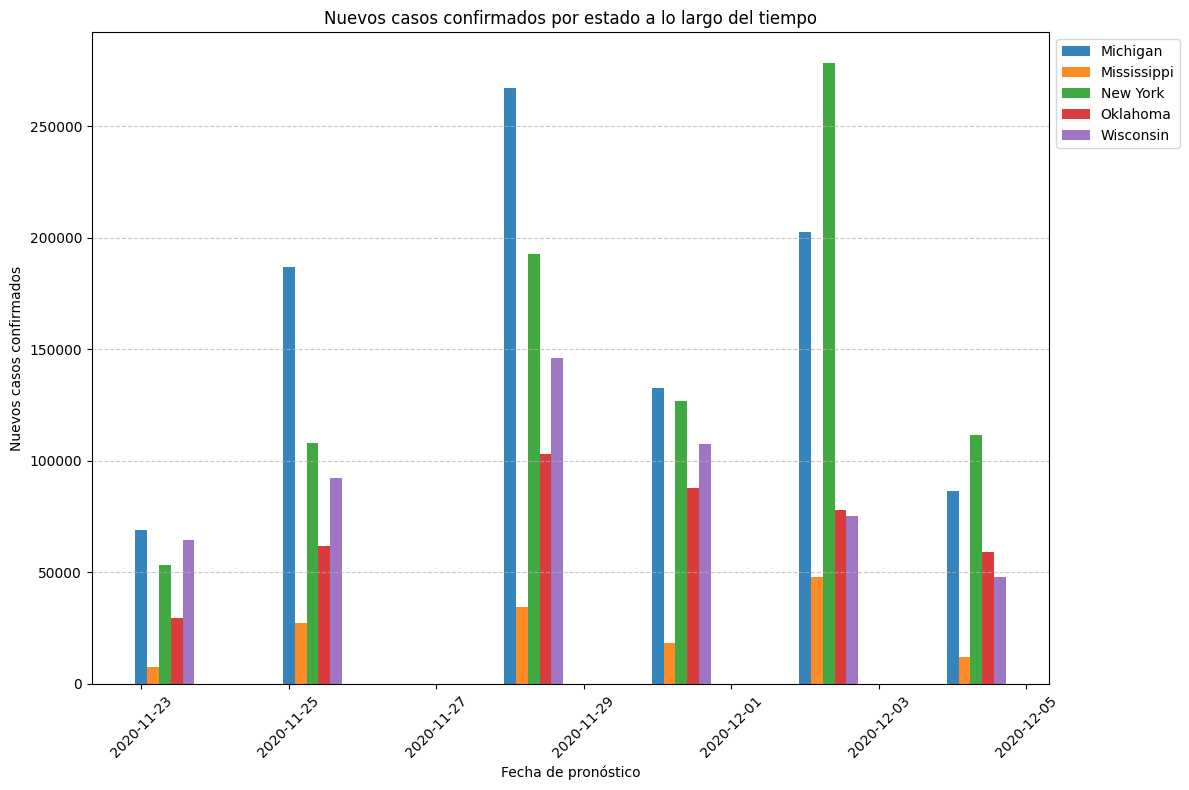

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la columna 'forecast_date' a tipo de dato datetime
new_datos['forecast_date'] = pd.to_datetime(new_datos['forecast_date'])

# Agrupar por estado y fecha de pronóstico, sumando los nuevos casos confirmados
grouped_data = new_datos.groupby(['state_name', 'forecast_date'])['new_confirmed'].sum().reset_index()

# Crear un gráfico de barras para cada estado
plt.figure(figsize=(12, 8))
states = grouped_data['state_name'].unique()
bar_width = 0.8 / len(states)  # Ancho de las barras, distribuido uniformemente para cada estado

for i, state in enumerate(states):
    state_data = grouped_data[grouped_data['state_name'] == state]
    x_values = state_data['forecast_date'] + pd.DateOffset(days=i*bar_width)  # Ajustar la posición de las barras
    plt.bar(x_values, state_data['new_confirmed'], width=bar_width, label=state, alpha=0.9)

# Configurar el gráfico
plt.title('Nuevos casos confirmados por estado a lo largo del tiempo')
plt.xlabel('Fecha de pronóstico')
plt.ylabel('Nuevos casos confirmados')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Colocar la leyenda fuera del gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla solo en el eje y
plt.tight_layout()
plt.show()


## Como se puede observar en el gráfico anterior, Mississippi es el estado que muestra un menor aumento de casos a medida que pasa el tiempo, a pesar de tener una población de alrededor de 3 millones de personas. En cambio, en Nueva York, se observa un panorama descontrolado del aumento de casos hasta el día 2020-12-05, a pesar de contar con una población aproximada de 19 millones. Esto podría explicar por qué los casos aumentan tanto en comparación con Mississippi.

## Como segundo gráfico, generaré un gráfico de líneas que mostrará la cantidad de muertes por estado a medida que pasa el tiempo.

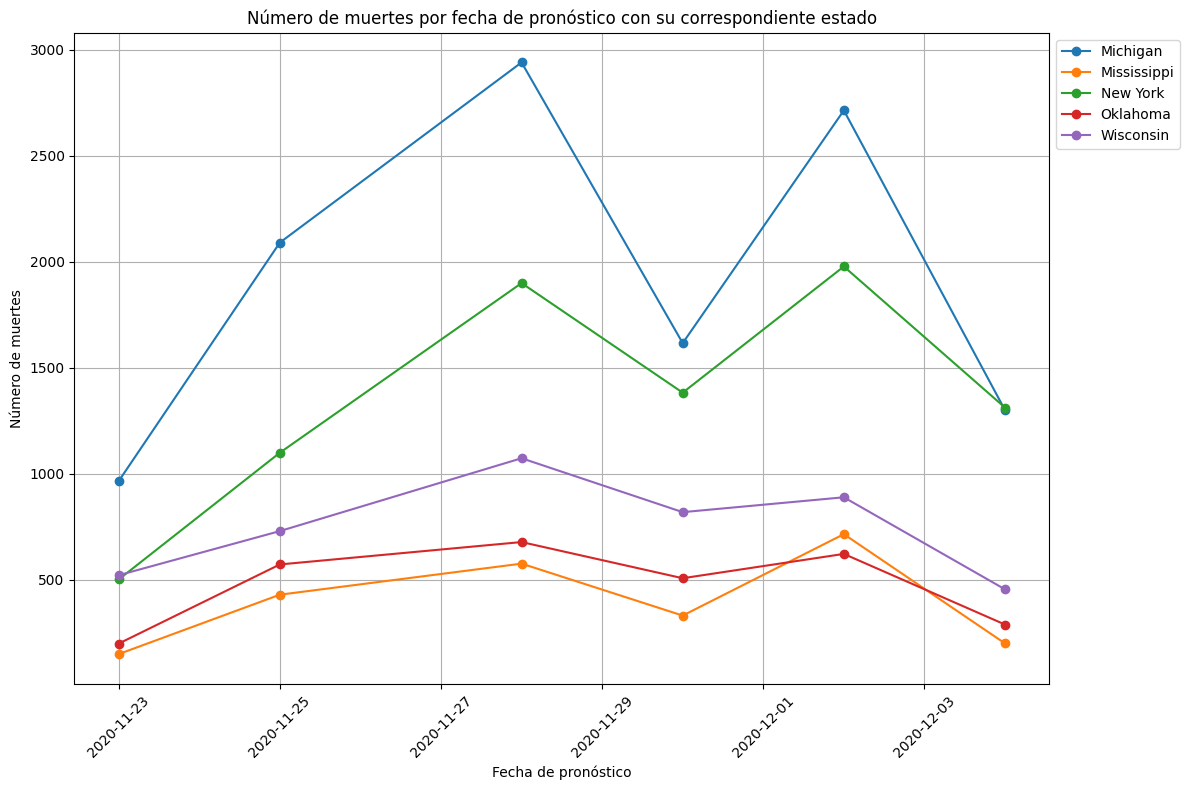

In [11]:

# Convertir la columna 'forecast_date' a tipo de dato datetime
new_datos['forecast_date'] = pd.to_datetime(new_datos['forecast_date'])

# Agrupar por estado y fecha de pronóstico, sumar el número de muertes
deaths_by_state_and_date = new_datos.groupby(['state_name', 'forecast_date'])['new_deaths'].sum()


plt.figure(figsize=(12, 8))
for state in new_datos['state_name'].unique():
    state_data = deaths_by_state_and_date[state]
    plt.plot(state_data.index, state_data.values, label=state, marker='o', linestyle='-')

# Configurar el gráfico
plt.title('Número de muertes por fecha de pronóstico con su correspondiente estado')
plt.xlabel('Fecha de pronóstico')
plt.ylabel('Número de muertes')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Colocar la leyenda fuera del gráfico
plt.grid(True)
plt.tight_layout()
plt.show()



# Como se puede observar, la cantidad de muertes se relaciona directamente con la cantidad de casos confirmados. Nueva York nuevamente registra un número mayor de muertes debido a su alto nivel de contagio, mientras que Mississippi se mantiene por debajo de las 1000 muertes a lo largo del tiempo.


# Como tercer gráfico, generaré un gráfico de torta para visualizar de mejor manera cómo se diferencian la cantidad de casos confirmados entre un estado y otro.

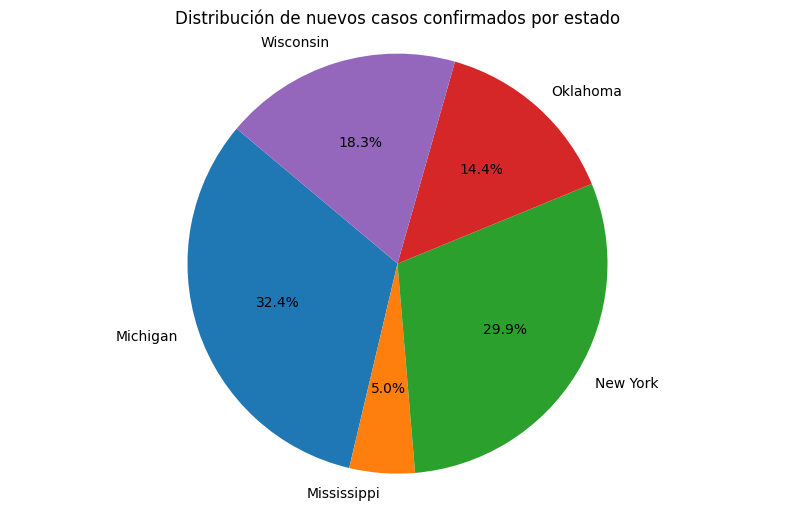

In [12]:
import matplotlib.pyplot as plt

# Calcular el total de nuevos casos confirmados por estado
nuevos_casos_por_estado = new_datos.groupby('state_name')['new_confirmed'].sum()

# Graficar el gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(nuevos_casos_por_estado, labels=nuevos_casos_por_estado.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de nuevos casos confirmados por estado')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Es evidente que Michigan lidera en casos confirmados a lo largo de todo el conjunto de datos, mientras que Mississippi registra niveles bajos de casos. Esta comparación ofrece una oportunidad para que otros estados puedan adoptar y adaptar las estrategias implementadas por Mississippi, con el objetivo de prevenir problemas similares en el futuro ante posibles nuevas pandemias.

## Y por último, generaré un código que creará un diccionario con la cantidad de muertes ocurridas en los estados estudiados anteriormente para la fecha 2020-11-28, con el fin de producir un mapa visual de la cantidad de muertes en Estados Unidos.

In [16]:

# Filtrar los datos para la fecha específica de interés
datos_filtrados = new_datos[new_datos['forecast_date'] == '2020-11-28']

# Sumar las muertes por estado para la fecha filtrada
muertes_por_estado_20201128 = datos_filtrados.groupby('state_name')['new_deaths'].sum()

# Diccionario inicial con los estados de interés
muertes_por_estado = {
    'Michigan': 0,  # Inicializar con 0 o cualquier valor por defecto
    'Mississippi': 0,
    'New York': 0,
    'Oklahoma': 0,
    'Wisconsin': 0,
}

# Actualizar el diccionario con los valores obtenidos de la suma
for estado in muertes_por_estado.keys():
    # Usar .get para evitar errores si el estado no está en muertes_por_estado_20201128
    muertes_por_estado[estado] = muertes_por_estado_20201128.get(estado, 0)

# Ahora, muertes_por_estado tiene los valores actualizados
print(muertes_por_estado)



{'Michigan': 2939.3183593651, 'Mississippi': 575.2932949067999, 'New York': 1898.4999999943, 'Oklahoma': 677.0224609295, 'Wisconsin': 1072.3676824573}



## Utilizando los datos sobre la cantidad de muertes, se generará un mapa que representará todos los estados previamente analizados. Cada estado será coloreado con una intensidad de rojo proporcional a la cantidad de fallecimientos; es decir, a mayor cantidad de muertes, mayor intensidad de color rojo. Este proceso se realizará mediante una API pública para visualizar el mapa de Estados Unidos.

In [17]:
import folium

# Obtener los límites geográficos de los estados de Estados Unidos desde la API de GeoJSON
response = requests.get('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json')
geo_json_data = response.json()

# Crear un mapa centrado en Michigan (aproximadamente)
mapa = folium.Map(location=[44.3148, -85.6024], zoom_start=6)

# Convertir el diccionario a DataFrame para su uso en Choropleth
df_muertes = pd.DataFrame(list(muertes_por_estado.items()), columns=['State', 'Deaths'])

# Filtrar el DataFrame para incluir solo los estados de interés
estados_interes = ['Michigan', 'Mississippi', 'New York', 'Oklahoma', 'Wisconsin']
df_muertes_filtrado = df_muertes[df_muertes['State'].isin(estados_interes)]

# Añadir los límites de los estados al mapa y colorearlos según la cantidad de muertes
# Solo para los estados de interés
folium.Choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=df_muertes_filtrado,
    columns=['State', 'Deaths'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',  # Escala de colores (puedes cambiarla según prefieras)
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Muertes por estado 2020-11-28'
).add_to(mapa)

# Añadir control de capas para alternar la visualización de la capa Choropleth
folium.LayerControl().add_to(mapa)

# Mostrar el mapa directamente en el Jupyter Notebook
mapa
